In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression

rand_st = 42

%matplotlib inline

In [8]:
titanik = pd.read_csv('train.csv', sep=',')

titanik.head(4)
#titanik.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [9]:
titanik.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
del titanik['Ticket']
del titanik['Name']
del titanik['PassengerId']

In [11]:
# For EDA you may want to split the original dataframe, and assign X and y later
titanik_train, titanik_validation = train_test_split(titanik, test_size=0.2, random_state= rand_st)

EDA

In [12]:
titanik_train_survived = titanik_train[titanik_train['Survived'] == 1]
titanik_train_survived.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
55,1,1,male,NaN,0,0,35.5,C52,S
865,1,2,female,42.0,0,0,13.0,NaN,S
81,1,3,male,29.0,0,0,9.5,NaN,S
259,1,2,female,50.0,0,1,26.0,NaN,S
486,1,1,female,35.0,1,0,90.0,C93,S


In [13]:
s_av = round(titanik_train_survived['Age'].mean(),2)
print(f'The average age of survived passengers was {s_av}.')

The average age of survived passengers was 28.45.


In [14]:
titanik_train_non_survived = titanik_train[titanik_train['Survived'] == 0]                           
s_n_av = round(titanik_train_non_survived['Age'].mean(),2)
print(f'The average age of drowned passengers was {s_n_av}.')

The average age of drowned passengers was 30.21.


In [15]:
aver_age  = titanik_train['Age'].mean()
titanik_train['Age'].replace(to_replace = np.nan, value = aver_age)

331    45.500000
733    23.000000
382    32.000000
704    26.000000
813     6.000000
         ...    
106    21.000000
270    29.498846
860    41.000000
435    14.000000
102    21.000000
Name: Age, Length: 712, dtype: float64

<Figure size 720x360 with 0 Axes>

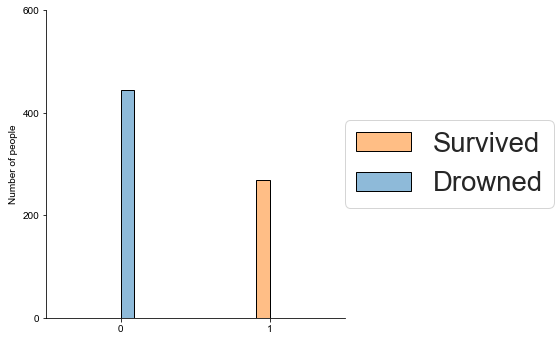

In [16]:
plt.figure(figsize=(10,5))
ax = sns.displot(titanik_train,x="Survived",hue ='Survived',legend = False)

ax.set(xlabel=' ', ylabel='Number of people')
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2.5 )

ax.set(xlim=(-0.5, 1.5), ylim=(0, 600), alpha = 1, frame_on = True)
plt.legend(['Survived','Drowned'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

In [17]:
survived_train_1st_class = titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]/titanik_train[titanik_train['Pclass'] == 1].shape[0]
Class_1 = titanik_train[titanik_train['Pclass'] == 1].shape[0]
surv_1_class = titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]
print(f'The amount of passengers in first class are {Class_1} and from them survived (Survived = 0) the {round(survived_train_1st_class,2)} people.')

The amount of passengers in first class are 163 and from them survived (Survived = 0) the 0.61 people.


In [18]:
titanik_train[titanik_train['Pclass'] == 1].shape[0]
titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]

99

In [19]:
dfg = titanik_train.groupby(['Sex','Pclass'])['Embarked'].count()
dfg

Sex     Pclass
female  1          68
        2          60
        3         115
male    1          93
        2          91
        3         283
Name: Embarked, dtype: int64

[Text(0.5, 0, 'Population')]

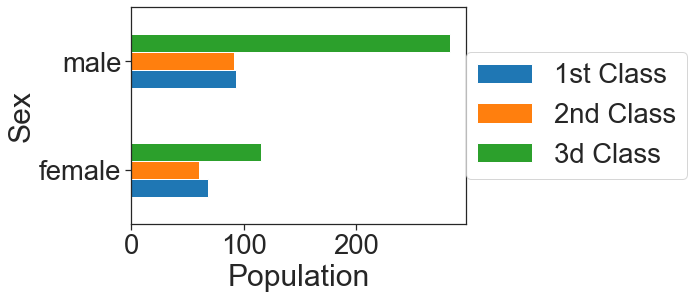

In [20]:
ax = titanik_train.groupby(['Sex','Pclass'])['Embarked'].count().unstack(1).plot.barh()
plt.legend(['1st Class','2nd Class','3d Class'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
ax.set(xlabel='Population')

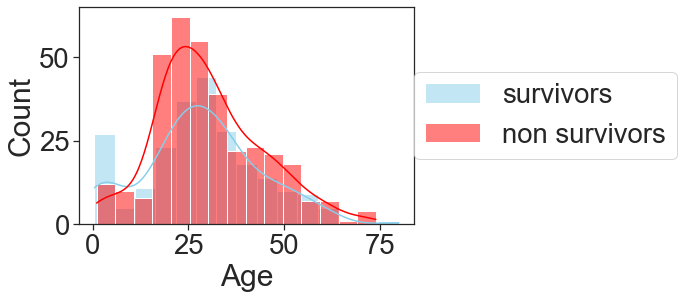

In [21]:
sns.histplot(data=titanik_train_survived, x="Age", color="skyblue", label="survivors", kde=True)
sns.histplot(data=titanik_train_non_survived, x="Age", color="red", label="non survivors", kde=True)

plt.legend() 
ax.set(xlabel='Age', ylabel='People')
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
plt.show()

In [22]:
Table_train = titanik_train.groupby(['Survived','Sex','Pclass'])['Survived'].count()
titanik_train1= pd.DataFrame(Table_train, index=pd.Index(['Population'],name = 'Pop'),
                  columns=pd.MultiIndex.from_product([['Yes', 'No'],['Female', 'Male'],['1','2','3']], names=['Survived:', 'Sex:', 'P_class']))
titanik_train1.style

In [23]:
# Treat of data to make possible the use in the model
# Change the string values Male Female into binary integer
# # convert gender to a Boolean

# my way but here I do not ommit noe of the new transformed features
#titanik_train.loc[titanik_train['Sex'] == 'female', 'Sex'] = 1
#titanik_train.loc[titanik_train['Sex'] == 'male', 'Sex'] = 0
#the Spiced way
titanik_train['female'] = titanik_train['Sex'].replace({'male': 0.0, 'female': 1.0})
titanik_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female
331,0,1,male,45.5,0,0,28.5000,C124,S,0.0
733,0,2,male,23.0,0,0,13.0000,NaN,S,0.0
382,0,3,male,32.0,0,0,7.9250,NaN,S,0.0
704,0,3,male,26.0,1,0,7.8542,NaN,S,0.0
813,0,3,female,6.0,4,2,31.2750,NaN,S,1.0


In [24]:
titanik_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Cabin       553
Embarked      2
female        0
dtype: int64

### Fill NaN values for numerical columns

In [26]:

# fill the NaN in the Age column with the mean value of Age

####### First way

titanik_train['Age'].fillna(value=titanik_train['Age'].mean(), inplace=True)


####### Second way

# impute missing values
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer.fit(titanik_train[['Age']])            # learn the most frequent value
#t = imputer.transform(titanik_train[['Age']])  # result is a numpy array
#
## format output as a DataFame
#cols_imputed = pd.DataFrame(t, columns=titanik_train[['Age']].columns)
#titanik_train[['Age']] = cols_imputed

In [27]:
# Find the first Letter from the Cabin of Passenger column to make different clssasification
titanik_train['Cabin'] = titanik_train['Cabin'].astype(str).str[0]
titanik_train['Cabin'].unique()

array(['C', 'n', 'B', 'F', 'D', 'E', 'A', 'G', 'T'], dtype=object)

In [28]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = titanik_train[['Cabin']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_cabin = pd.DataFrame(t, columns=ohc.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = titanik_train[['Pclass']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_class = pd.DataFrame(t, columns=ohc.get_feature_names()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_class.head()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_1,x0_2,x0_3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
# 1. create a feature engineering tool
k = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile')

# 2. fit with the training data (some columns of it)
k.fit(titanik_train[['Age']])

# 3. transform the training data
bins = k.transform(titanik_train[['Age']])
bins = pd.DataFrame(bins.todense())  # materializes a sparse matrix so that we can see it
# ALWAYS DO THIS UNLESS YOUR DATA SET IS REALLY BIG
bins.head()


In [ ]:
titanik_train.columns

In [ ]:
#titanik_train.reset_index(inplace=True)
unmodified = titanik_train[['Survived','SibSp','Parch','Fare']]

In [ ]:
scaler = MinMaxScaler()  # scales every column independently
scaler.fit(titanik_train[['Fare']])
titanik_final_train = scaler.transform(titanik_train[['Fare']]) # output is a numpy array, not a df
fare_scaled = pd.DataFrame(t, columns=titanik_train[['Fare']])
fare_scaled.head()

In [ ]:
titanik_BF = pd.concat([bins, OHE_cabin, OHE_class,unmodified], axis=1)
titanik_BF.shape

In [ ]:
titanik_BF.head(4)

In [ ]:
sns.pairplot(titanik_train, hue = 'Survived')

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
X = titanik[['Sex']] # I also checked extra features like Class and Age but it did not give better result in the end so i reduced the features.
y = titanik['Survived']

In [ ]:
m = LogisticRegression()    # create the model
m.fit(X, y)                 # train the model -> find best coefficients

m.coef_

In [ ]:
# calculate the accuracy
m.score(X, y)

In [ ]:
ypred = m.predict(X)   # prediction for the same data points

In [ ]:
ypred[:10]

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title('true')
sns.scatterplot(x='Age', y='PassengerId', hue='Survived', data=titanik)
plt.title('predicted')
plt.subplot(2,1,2)
sns.scatterplot(x='Age', y='PassengerId', hue=ypred, data = titanik)

In [ ]:
#X_test = titanik_test[['Sex']] # I also checked extra features like Class and Age but it did not give better result in the end so i reduced the features.
#y_test = titanik_test['Survived']
#m.score(X_test, y_test)
#ypred = m.predict(X_test)
#plt.figure(figsize=(12, 8))
#plt.subplot(2,1,1)
#plt.title('true')
#sns.scatterplot(x='Age', y='PassengerId', hue='Survived', data=titanik)
##plt.title('predicted')
#plt.subplot(2,1,2)
#sns.scatterplot(x=titanik_test['Age'], y=titanik_test['PassengerId'], hue=ypred)